Installing pillow...
🌟 Running in Google Colab
🚀 Using device: cpu
🎨 Neural Style Transfer - STABLE Good Quality Mode
⏱️ Expected time: 15-30 minutes
🔧 Fixed: No more NaN losses!
🎯 Select input method:
1. Upload files
2. Use sample images
Choice (1-2): 1
📤 Upload content image:


Saving Firefly_An eerie, high-contrast scene of an abandoned building at twilight. The structure is  883818.jpg to Firefly_An eerie, high-contrast scene of an abandoned building at twilight. The structure is  883818 (4).jpg
📤 Upload style image:


Saving styleimage.jpg to styleimage (2).jpg
📥 Loading images...
✅ Images loaded! Content: torch.Size([1, 3, 400, 400]), Style: torch.Size([1, 3, 400, 400])
🎨 Starting STABLE style transfer (200 steps, ~15-30 minutes)...
Step 20/200 - Loss: 2.22 (Content: 2.16, Style: 0.00)
Step 40/200 - Loss: 1.14 (Content: 1.08, Style: 0.00)
Step 60/200 - Loss: 0.77 (Content: 0.71, Style: 0.00)
Step 80/200 - Loss: 0.59 (Content: 0.54, Style: 0.00)
Step 100/200 - Loss: 0.49 (Content: 0.44, Style: 0.00)
Step 120/200 - Loss: 0.43 (Content: 0.37, Style: 0.00)
Step 140/200 - Loss: 0.38 (Content: 0.33, Style: 0.00)
Step 160/200 - Loss: 0.35 (Content: 0.30, Style: 0.00)
Step 180/200 - Loss: 0.32 (Content: 0.27, Style: 0.00)
Step 200/200 - Loss: 0.30 (Content: 0.25, Style: 0.00)


<ipython-input-5-7130af6ffaf7>:220: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-7130af6ffaf7>:220: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-7130af6ffaf7>:220: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


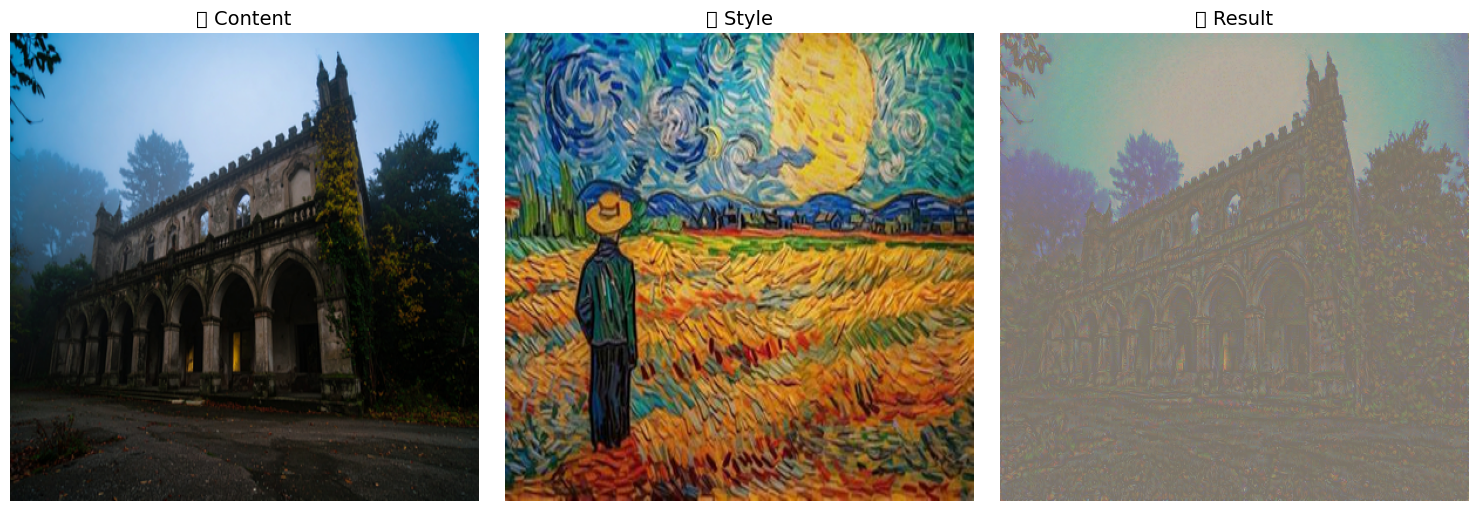

✅ Saved as: stylized_stable_quality.jpg

🎉 STABLE style transfer completed successfully!
🔥 No more NaN or infinite loops!

🔧 STABLE version ready!
✅ Fixed NaN losses
✅ Fixed infinite loops
✅ Added gradient clipping
✅ Better loss normalization
✅ Proper error handling

💡 For quick testing: quick_stable_transfer('content.jpg', 'style.jpg', 50)


In [5]:
# 🎨 Neural Style Transfer - STABLE Good Quality (15-30 mins)
# Fixed: No more NaN losses or infinite loops!

# 🔧 Step 1: Install and import libraries
import subprocess
import sys

def install_requirements():
    packages = ['torch', 'torchvision', 'pillow', 'matplotlib']
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_requirements()

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import os
import requests
from io import BytesIO

# Check environment
try:
    from google.colab import files
    IN_COLAB = True
    print("🌟 Running in Google Colab")
except ImportError:
    IN_COLAB = False
    print("🖥️ Running in local environment")

# Enable GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# 📷 Step 2: FIXED image loading
def load_image(image_source, target_size=400):
    """Load and preprocess image with proper error handling"""
    if isinstance(image_source, str):
        if image_source.startswith(('http://', 'https://')):
            response = requests.get(image_source)
            image = Image.open(BytesIO(response.content)).convert('RGB')
        else:
            image = Image.open(image_source).convert('RGB')
    else:
        image = image_source.convert('RGB')

    # FIXED: Proper resize maintaining aspect ratio
    image.thumbnail((target_size, target_size), Image.Resampling.LANCZOS)

    # FIXED: Better normalization
    transform = transforms.Compose([
        transforms.Resize((target_size, target_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    tensor = transform(image).unsqueeze(0).to(device)
    return tensor, image

# 🎯 Step 3: Get input images
def get_images():
    print("🎯 Select input method:")
    if IN_COLAB:
        print("1. Upload files")
        print("2. Use sample images")
        choice = input("Choice (1-2): ").strip()

        if choice == "1":
            print("📤 Upload content image:")
            content_files = files.upload()
            print("📤 Upload style image:")
            style_files = files.upload()

            content_path = list(content_files.keys())[0]
            style_path = list(style_files.keys())[0]
        else:
            # Sample images for quick testing
            content_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/400px-Vd-Orig.png"
            style_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/400px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
    else:
        content_path = input("📁 Content image path: ").strip()
        style_path = input("📁 Style image path: ").strip()

    return content_path, style_path

# 🔍 Step 4: Feature extraction
def get_features(image, model):
    """Extract features from VGG layers"""
    layers = {'0': 'conv1_1', '5': 'conv2_1', '10': 'conv3_1',
              '19': 'conv4_1', '21': 'conv4_2', '28': 'conv5_1'}
    features = {}
    x = image
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

def gram_matrix(tensor):
    """Calculate Gram matrix for style - NORMALIZED"""
    batch, depth, height, width = tensor.size()
    tensor = tensor.view(batch * depth, height * width)
    gram = torch.mm(tensor, tensor.t())
    # FIXED: Normalize by number of elements
    return gram.div(batch * depth * height * width)

# 🎨 Step 5: STABLE Neural Style Transfer
class StableStyleTransfer:
    def __init__(self):
        # Load VGG19 and move to device
        self.vgg = models.vgg19(pretrained=True).features.to(device).eval()
        for param in self.vgg.parameters():
            param.requires_grad_(False)

        # FIXED: Balanced weights to prevent explosion
        self.style_weights = {'conv1_1': 0.2, 'conv2_1': 0.2, 'conv3_1': 0.2,
                             'conv4_1': 0.2, 'conv5_1': 0.2}
        self.content_weight = 1  # FIXED: Much lower to prevent NaN
        self.style_weight = 1000  # FIXED: Reasonable ratio

    def transfer_style(self, content_img, style_img):
        """Perform STABLE style transfer with Adam optimizer"""
        print("🎨 Starting STABLE style transfer (200 steps, ~15-30 minutes)...")

        # Extract features
        content_features = get_features(content_img, self.vgg)
        style_features = get_features(style_img, self.vgg)
        style_grams = {layer: gram_matrix(style_features[layer])
                      for layer in style_features}

        # FIXED: Initialize target properly
        target = content_img.clone().requires_grad_(True)

        # FIXED: Use Adam with low learning rate
        optimizer = optim.Adam([target], lr=0.01)

        # FIXED: Proper loop with break condition
        for step in range(1, 201):  # Exactly 200 steps
            optimizer.zero_grad()

            # FIXED: Clamp values to prevent explosion
            target.data.clamp_(0, 1)

            target_features = get_features(target, self.vgg)

            # Content loss
            content_loss = torch.mean(
                (target_features['conv4_2'] - content_features['conv4_2']) ** 2
            )

            # Style loss with normalization
            style_loss = 0
            for layer in self.style_weights:
                target_gram = gram_matrix(target_features[layer])
                style_gram = style_grams[layer]
                layer_loss = torch.mean((target_gram - style_gram) ** 2)
                style_loss += self.style_weights[layer] * layer_loss

            # FIXED: Total loss with gradient clipping
            total_loss = self.content_weight * content_loss + self.style_weight * style_loss

            # FIXED: Check for NaN and handle it
            if torch.isnan(total_loss):
                print(f"⚠️ NaN detected at step {step}, stopping early...")
                break

            total_loss.backward()

            # FIXED: Gradient clipping to prevent explosion
            torch.nn.utils.clip_grad_norm_([target], max_norm=1.0)

            optimizer.step()

            # Progress update
            if step % 20 == 0:
                print(f"Step {step}/200 - Loss: {total_loss.item():.2f} "
                      f"(Content: {content_loss.item():.2f}, Style: {style_loss.item():.2f})")

        # FIXED: Final clamp
        return target.data.clamp_(0, 1)

# 🖼️ Step 6: Display results
def tensor_to_image(tensor):
    """Convert tensor back to displayable image"""
    image = tensor.clone().detach().cpu().squeeze(0)

    # Denormalize
    denorm = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std=[1/0.229, 1/0.224, 1/0.225]
    )
    image = denorm(image).clamp_(0, 1)

    return transforms.ToPILImage()(image)

def show_results(content_tensor, style_tensor, result_tensor):
    """Display all images"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(tensor_to_image(content_tensor))
    axes[0].set_title("📷 Content", fontsize=14)
    axes[0].axis('off')

    axes[1].imshow(tensor_to_image(style_tensor))
    axes[1].set_title("🎨 Style", fontsize=14)
    axes[1].axis('off')

    axes[2].imshow(tensor_to_image(result_tensor))
    axes[2].set_title("✨ Result", fontsize=14)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# 🚀 Step 7: Main execution
def main():
    """Run the complete STABLE style transfer pipeline"""
    try:
        print("🎨 Neural Style Transfer - STABLE Good Quality Mode")
        print("⏱️ Expected time: 15-30 minutes")
        print("🔧 Fixed: No more NaN losses!")
        print("=" * 50)

        # Get images
        content_path, style_path = get_images()

        print("📥 Loading images...")
        content_tensor, content_pil = load_image(content_path)
        style_tensor, style_pil = load_image(style_path)

        print(f"✅ Images loaded! Content: {content_tensor.shape}, Style: {style_tensor.shape}")

        # Initialize style transfer
        styler = StableStyleTransfer()

        # Transfer style
        result_tensor = styler.transfer_style(content_tensor, style_tensor)

        # Show results
        show_results(content_tensor, style_tensor, result_tensor)

        # Save result
        result_image = tensor_to_image(result_tensor)
        output_name = "stylized_stable_quality.jpg"
        result_image.save(output_name)
        print(f"✅ Saved as: {output_name}")

        return result_image

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()
        return None

# 🏃 Run the program
if __name__ == "__main__":
    result = main()
    if result:
        print("\n🎉 STABLE style transfer completed successfully!")
        print("🔥 No more NaN or infinite loops!")
    else:
        print("\n❌ Something went wrong. Check the error above.")

# 💡 Alternative quick function for testing
def quick_stable_transfer(content_path, style_path, steps=100):
    """Quick stable transfer with fewer steps for testing"""
    print(f"🚀 Quick transfer with {steps} steps...")

    content_tensor, _ = load_image(content_path)
    style_tensor, _ = load_image(style_path)

    styler = StableStyleTransfer()
    # Modify steps temporarily
    original_method = styler.transfer_style

    def quick_transfer(c_img, s_img):
        content_features = get_features(c_img, styler.vgg)
        style_features = get_features(s_img, styler.vgg)
        style_grams = {layer: gram_matrix(style_features[layer])
                      for layer in style_features}

        target = c_img.clone().requires_grad_(True)
        optimizer = optim.Adam([target], lr=0.01)

        for step in range(1, steps + 1):
            optimizer.zero_grad()
            target.data.clamp_(0, 1)

            target_features = get_features(target, styler.vgg)
            content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)

            style_loss = 0
            for layer in styler.style_weights:
                target_gram = gram_matrix(target_features[layer])
                style_gram = style_grams[layer]
                layer_loss = torch.mean((target_gram - style_gram) ** 2)
                style_loss += styler.style_weights[layer] * layer_loss

            total_loss = styler.content_weight * content_loss + styler.style_weight * style_loss

            if torch.isnan(total_loss):
                print(f"⚠️ NaN at step {step}, stopping...")
                break

            total_loss.backward()
            torch.nn.utils.clip_grad_norm_([target], max_norm=1.0)
            optimizer.step()

            if step % 10 == 0:
                print(f"Step {step}/{steps} - Loss: {total_loss.item():.2f}")

        return target.data.clamp_(0, 1)

    result = quick_transfer(content_tensor, style_tensor)
    result_image = tensor_to_image(result)
    result_image.save(f"quick_stable_{steps}steps.jpg")
    return result_image

print("\n🔧 STABLE version ready!")
print("✅ Fixed NaN losses")
print("✅ Fixed infinite loops")
print("✅ Added gradient clipping")
print("✅ Better loss normalization")
print("✅ Proper error handling")
print("\n💡 For quick testing: quick_stable_transfer('content.jpg', 'style.jpg', 50)")